In [1]:
# Import Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install PIL
!pip install langdetect
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


Defaulting to user installation because normal site-packages is not writeable


In [17]:
from datetime import date
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-11-07"
end = "2022-12-26"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

print(savedTweets['Analysis'].value_counts())#shows the counts of tweets' polarity

import matplotlib.pyplot as plt

X = ['Week 0', 'Week 1','Week 2','Week 3', 'Week 4', 'Week 5', 'Week 6']

Neutral = [59, 124, 42, 47, 33, 33, 43]
Positive = [33, 79, 27, 46, 23, 39, 44]
Negative = [12, 18, 11, 7, 6, 22, 19]


Defaulting to user installation because normal site-packages is not writeable


C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\3551802829.py:18: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Neutral     381
Positive    291
Negative     95
Name: Analysis, dtype: int64


In [18]:
summation = 0
for n in Neutral:
    summation += n
print('Neutral:', summation)
summation = 0
for n in Positive:
    summation += n
print('Positive:', summation)
summation = 0
for n in Negative:
    summation += n
print('Negative:', summation)


Neutral: 381
Positive: 291
Negative: 95


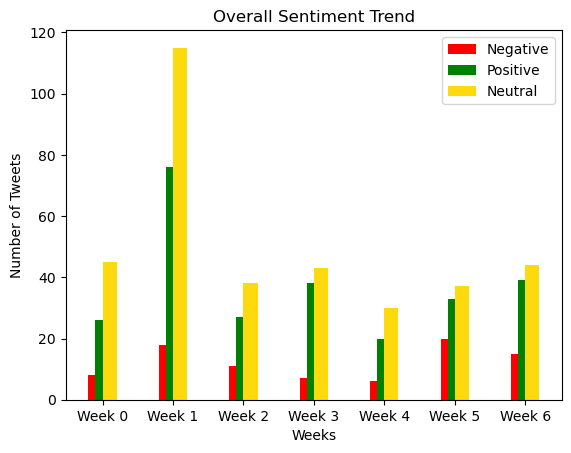

In [3]:
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.1, Negative, 0.2, label = 'Negative', color='red')
plt.bar(X_axis + 0, Positive, 0.2, label = 'Positive', color='green')
plt.bar(X_axis + 0.1, Neutral, 0.2, label = 'Neutral', color='#FDDA0D')
  
plt.xticks(X_axis, X)
plt.xlabel("Weeks")
plt.ylabel("Number of Tweets")
plt.title("Overall Sentiment Trend")
plt.legend()
plt.show()

In [4]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-11-07"
end = "2022-11-14"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity


C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\1939886866.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Neutral     59
Positive    33
Negative    12
Name: Analysis, dtype: int64

In [5]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-11-14"
end = "2022-11-21"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity


C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\545868453.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Neutral     124
Positive     79
Negative     18
Name: Analysis, dtype: int64

In [6]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-11-21"
end = "2022-11-28"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity



C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\2532125518.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Neutral     42
Positive    27
Negative    11
Name: Analysis, dtype: int64

In [7]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-11-28"
end = "2022-12-05"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity


C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\1692578792.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Neutral     47
Positive    46
Negative     7
Name: Analysis, dtype: int64

In [8]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-12-05"
end = "2022-12-12"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity


C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\4022425698.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Neutral     33
Positive    23
Negative     6
Name: Analysis, dtype: int64

In [9]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-12-12"
end = "2022-12-19"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity


C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\2994525503.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Positive    39
Neutral     33
Negative    22
Name: Analysis, dtype: int64

In [10]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keywords = ['UCSB strike', 'UCSB TA', 'UCSB grad', 'UCSB grading', 'UCSB UAW', 'UCSB agreement', 'UCSB striking', 'UCSB research', 'UCSB union', 'UCSB protest', 'UCSB picket', 'SB strike']
tweets_list = []
start = "2022-12-19"
end = "2022-12-26"
maxTweets = 1000
# Using TwitterSearchScraper to scrape data and append tweets to list
for keyword in keywords:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keyword} + since:{start} until:{end} + include:replies').get_items()):
        if i>maxTweets:
            break
        tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])


#clean the tweets with a function
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet


tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<=-0.1:
        return 'Negative'
    elif score >-0.1 and score <0.1:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity


C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\1184897458.py:17: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Positive    44
Neutral     43
Negative    19
Name: Analysis, dtype: int64

In [11]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

# Create a list to append tweet data
keyword = 'uaw2865sb'
tweets_list = []
start = "2022-11-07"
end = "2022-12-26"
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:uaw2865sb since:2022-11-07 until:2022-12-25').get_items()):
    if i>500:
        break
    tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above 
tweets_df1 = pd.DataFrame(tweets_list, columns=['Text'])

def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

#applying this function to Text column of our dataframe
tweets_df1["Text"] = tweets_df1["Text"].apply(cleanTxt)

def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
tweet_list1 = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for tweet in tweets_df1['Text']:
    tweet_list1.append(tweet)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(tweet) #appending the tweet that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(tweet) #appending the tweet that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(tweet) #appending the tweet that satisfies this condition
        neutral += 1 #increasing the count by 1 

positive = percentage(positive, len(tweets_df1)) #percentage is the function defined above
negative = percentage(negative, len(tweets_df1))
neutral = percentage(neutral, len(tweets_df1))

tweet_list1 = pd.DataFrame(tweet_list1)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n*')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n*')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n*')



C:\Users\yeahs\AppData\Local\Temp\ipykernel_25304\1735541542.py:14: FutureWarning: content is deprecated, use rawContent instead
  tweets_list.append([tweet.content])


Positive Sentiment: 28.00
*Neutral Sentiment: 20.00
*Negative Sentiment: 17.00
*